In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from matplotlib import pyplot
import cv2
from sklearn.model_selection import train_test_split 
import keras
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
from random import shuffle
import tensorflow as tf
from skimage.measure import block_reduce
from tensorflow import image
from sklearn.metrics import classification_report
from PIL import Image
import os
import PIL
import torchvision
import torchvision.transforms as T

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Part 1

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
#original size: 32*32
#resize 24*24
train_images_reshaped24 = np.zeros((len(x_train), 24, 24, 3,))
resized_train_image24 = np.zeros((len(x_train), 32, 32, 3,))

train_images_reshaped16 = np.zeros((len(x_train), 16, 16, 3,))
resized_train_image16 = np.zeros((len(x_train), 32, 32, 3,))

test_images_reshaped16 = np.zeros((len(x_test), 16, 16, 3,))
resized_test_image16 = np.zeros((len(x_test), 32, 32, 3,))

test_images_reshaped24 = np.zeros((len(x_test), 24, 24, 3,))
resized_test_image24 = np.zeros((len(x_test), 32, 32, 3,))

for a in range(len(x_train)):
    train_images_reshaped24[a] = cv2.resize(x_train[a], dsize=(24, 24))
for a in range(len(x_train)):
    img = train_images_reshaped24[a]
    resized_train_image24[a] = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

for a in range(len(x_test)):
    test_images_reshaped24[a] = cv2.resize(x_test[a], dsize=(24, 24))
for a in range(len(x_test)):
    img = test_images_reshaped24[a]
    resized_test_image24[a] = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
#resize 16*16
for a in range(len(x_train)):
    train_images_reshaped16[a] = cv2.resize(x_train[a], dsize=(16, 16))
for a in range(len(x_train)):
    img = train_images_reshaped16[a]
    resized_train_image16[a] = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

for a in range(len(x_test)):
    test_images_reshaped16[a] = cv2.resize(x_test[a], dsize=(16, 16))
for a in range(len(x_test)):
    img = test_images_reshaped16[a]
    resized_test_image16[a] = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

#resize 8*8
train_images_reshaped8 = np.zeros((len(x_train), 8, 8, 3,))
resized_train_image8 = np.zeros((len(x_train), 32, 32, 3,))

test_images_reshaped8 = np.zeros((len(x_test), 8, 8, 3,))
resized_test_image8 = np.zeros((len(x_test), 32, 32, 3,))


for a in range(len(x_train)):
    train_images_reshaped8[a] = cv2.resize(x_train[a], dsize=(8, 8))
for a in range(len(x_train)):
    img = train_images_reshaped8[a]
    resized_train_image8[a] = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

for a in range(len(x_test)):
    test_images_reshaped8[a] = cv2.resize(x_test[a], dsize=(8, 8))
for a in range(len(x_test)):
    img = test_images_reshaped8[a]
    resized_test_image8[a] = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)

(10000, 32, 32, 3)


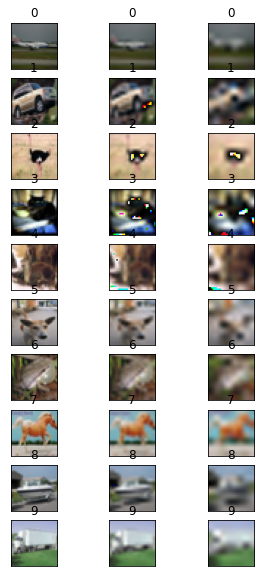

In [8]:
fig = plt.figure(figsize=(5, 10))
for i in range(10):
  class_indices = np.where(y_train == i)[0]
  class_x32 = x_train[class_indices]
  class_x16 = resized_train_image16[class_indices]
  class_x8 = resized_train_image8[class_indices]
  rnd_idx = np.random.randint(len(class_x32))
  image1 = class_x32[rnd_idx]
  image2 = class_x16[rnd_idx]
  image3 = class_x8[rnd_idx]

  ax = fig.add_subplot(10, 3, 3*i + 1, xticks=[], yticks=[])
  plt.imshow(image1)
  ax.set_title(i)
  ax = fig.add_subplot(10, 3, 3*i + 2, xticks=[], yticks=[])
  plt.imshow((image2).astype(np.uint8))
  ax.set_title(i)
  ax = fig.add_subplot(10, 3, 3*i + 3, xticks=[], yticks=[])
  plt.imshow((image3).astype(np.uint8))
  ax.set_title(i)
  
print(resized_test_image16.shape)
  #plt.show()

In [9]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#Model definition

In [10]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

# TVTV Method

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, 
                    validation_split = 0.1)


313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1000
           1       0.88      0.86      0.87      1000
           2       0.63      0.66      0.64      1000
           3       0.61      0.49      0.54      1000
           4       0.69      0.71      0.70      1000
           5       0.71      0.57      0.63      1000
           6       0.67      0.87      0.75      1000
           7       0.85      0.79      0.82      1000
           8       0.83      0.87      0.85      1000
           9       0.86      0.81      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000



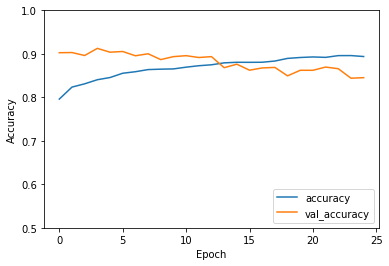

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(resized_train_image24, y_train, epochs=20, 
                    validation_split = 0.1)

Epoch 1/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.2870 - accuracy: 0.5502 - val_loss: 1.0966 - val_accuracy: 0.6232
Epoch 2/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2116 - accuracy: 0.5772 - val_loss: 1.2208 - val_accuracy: 0.5854
Epoch 3/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1819 - accuracy: 0.5851 - val_loss: 1.0111 - val_accuracy: 0.6430
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1566 - accuracy: 0.5957 - val_loss: 0.9707 - val_accuracy: 0.6706
Epoch 5/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.1269 - accuracy: 0.6061 - val_loss: 0.9635 - val_accuracy: 0.6622
Epoch 6/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1131 - accuracy: 0.6079 - val_loss: 1.0448 - val_accuracy: 0.6390
Epoch 7/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.0961 - accuracy: 0.6163 - val_loss: 1.0343 - val_accuracy

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.68      0.74      1000
           1       0.90      0.76      0.82      1000
           2       0.62      0.47      0.54      1000
           3       0.49      0.42      0.45      1000
           4       0.58      0.69      0.63      1000
           5       0.53      0.60      0.56      1000
           6       0.61      0.83      0.70      1000
           7       0.77      0.72      0.75      1000
           8       0.82      0.82      0.82      1000
           9       0.77      0.84      0.80      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



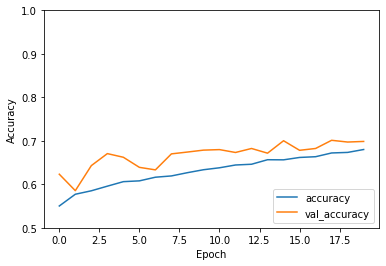

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(resized_test_image24)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(resized_train_image16, y_train, epochs=20, 
                    validation_split = 0.1)

Epoch 1/20
1407/1407 [==============================] - 11s 7ms/step - loss: 1.6546 - accuracy: 0.4258 - val_loss: 1.4645 - val_accuracy: 0.4934
Epoch 2/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5302 - accuracy: 0.4654 - val_loss: 1.3255 - val_accuracy: 0.5364
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5811 - accuracy: 0.4455 - val_loss: 1.2945 - val_accuracy: 0.5464
Epoch 4/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4723 - accuracy: 0.4838 - val_loss: 1.2607 - val_accuracy: 0.5522
Epoch 5/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4448 - accuracy: 0.5005 - val_loss: 1.2369 - val_accuracy: 0.5668
Epoch 6/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4101 - accuracy: 0.5066 - val_loss: 1.2298 - val_accuracy: 0.5746
Epoch 7/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3756 - accuracy: 0.5204 - val_loss: 1.2179 - val_accuracy

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.71      0.64      0.67      1000
           2       0.46      0.46      0.46      1000
           3       0.38      0.31      0.34      1000
           4       0.53      0.41      0.46      1000
           5       0.45      0.50      0.48      1000
           6       0.58      0.64      0.61      1000
           7       0.64      0.61      0.62      1000
           8       0.58      0.75      0.65      1000
           9       0.62      0.63      0.63      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



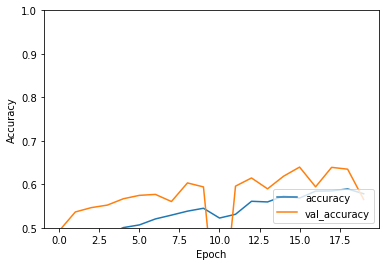

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(resized_test_image16)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(resized_train_image8, y_train, epochs=20, 
                    validation_split = 0.1)

Epoch 1/20
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6570 - accuracy: 0.4065 - val_loss: 1.5762 - val_accuracy: 0.4252
Epoch 2/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.6037 - accuracy: 0.4226 - val_loss: 1.4895 - val_accuracy: 0.4634
Epoch 3/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5695 - accuracy: 0.4339 - val_loss: 1.4921 - val_accuracy: 0.4616
Epoch 4/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5537 - accuracy: 0.4424 - val_loss: 1.4511 - val_accuracy: 0.4744
Epoch 5/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5291 - accuracy: 0.4475 - val_loss: 1.4456 - val_accuracy: 0.4732
Epoch 6/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5256 - accuracy: 0.4475 - val_loss: 1.4152 - val_accuracy: 0.4916
Epoch 7/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5297 - accuracy: 0.4500 - val_loss: 1.4077 - val_accuracy

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.49      0.53      1000
           1       0.59      0.48      0.53      1000
           2       0.37      0.22      0.28      1000
           3       0.25      0.34      0.29      1000
           4       0.43      0.27      0.33      1000
           5       0.30      0.43      0.35      1000
           6       0.47      0.37      0.41      1000
           7       0.35      0.67      0.46      1000
           8       0.67      0.32      0.43      1000
           9       0.46      0.54      0.50      1000

    accuracy                           0.41     10000
   macro avg       0.45      0.41      0.41     10000
weighted avg       0.45      0.41      0.41     10000



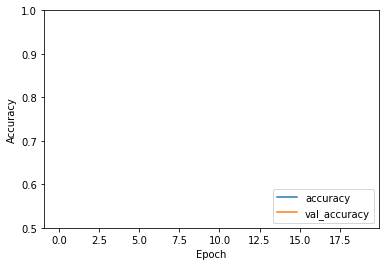

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(resized_test_image8)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

## TOTV Method

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=25, 
                    validation_split = 0.1)

Epoch 1/25
1407/1407 [==============================] - 17s 7ms/step - loss: 1.7373 - accuracy: 0.3797 - val_loss: 1.2853 - val_accuracy: 0.5450
Epoch 2/25
1407/1407 [==============================] - 9s 7ms/step - loss: 1.2543 - accuracy: 0.5516 - val_loss: 1.0245 - val_accuracy: 0.6364
Epoch 3/25
1407/1407 [==============================] - 9s 6ms/step - loss: 1.0848 - accuracy: 0.6150 - val_loss: 0.9334 - val_accuracy: 0.6696
Epoch 4/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9941 - accuracy: 0.6501 - val_loss: 0.8607 - val_accuracy: 0.6924
Epoch 5/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.9359 - accuracy: 0.6707 - val_loss: 0.8262 - val_accuracy: 0.7140
Epoch 6/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.8938 - accuracy: 0.6866 - val_loss: 0.7977 - val_accuracy: 0.7224
Epoch 7/25
1407/1407 [==============================] - 9s 7ms/step - loss: 0.8627 - accuracy: 0.6943 - val_loss: 0.8678 - val_accuracy

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.50      0.54      1000
           1       0.91      0.26      0.40      1000
           2       0.31      0.60      0.41      1000
           3       0.25      0.45      0.32      1000
           4       0.36      0.42      0.39      1000
           5       0.30      0.58      0.40      1000
           6       0.62      0.11      0.19      1000
           7       0.84      0.28      0.42      1000
           8       0.52      0.68      0.59      1000
           9       0.81      0.14      0.23      1000

    accuracy                           0.40     10000
   macro avg       0.55      0.40      0.39     10000
weighted avg       0.55      0.40      0.39     10000



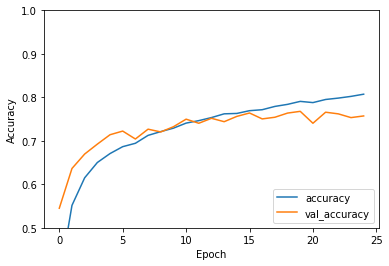

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(resized_test_image16)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.31      0.32      0.32      1000
           1       0.92      0.01      0.02      1000
           2       0.21      0.45      0.29      1000
           3       0.17      0.50      0.25      1000
           4       0.25      0.15      0.19      1000
           5       0.19      0.11      0.14      1000
           6       0.25      0.01      0.02      1000
           7       0.43      0.01      0.01      1000
           8       0.25      0.65      0.36      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.22     10000
   macro avg       0.30      0.22      0.16     10000
weighted avg       0.30      0.22      0.16     10000



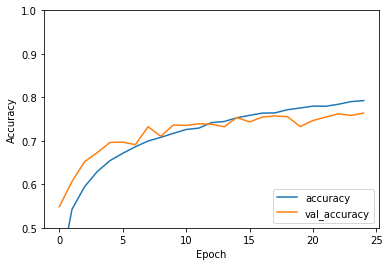

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(resized_test_image8)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.74      1000
           1       0.92      0.75      0.83      1000
           2       0.55      0.61      0.58      1000
           3       0.41      0.57      0.47      1000
           4       0.56      0.70      0.62      1000
           5       0.53      0.62      0.57      1000
           6       0.87      0.53      0.66      1000
           7       0.83      0.70      0.76      1000
           8       0.78      0.81      0.79      1000
           9       0.88      0.71      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.71      0.67      0.68     10000
weighted avg       0.71      0.67      0.68     10000



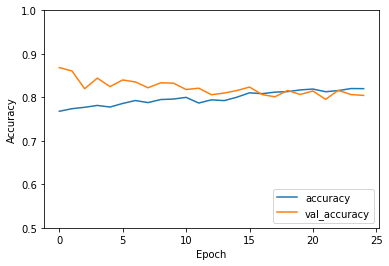

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(resized_test_image24)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1000
           1       0.89      0.84      0.87      1000
           2       0.68      0.57      0.62      1000
           3       0.51      0.57      0.54      1000
           4       0.63      0.74      0.68      1000
           5       0.67      0.58      0.62      1000
           6       0.72      0.82      0.77      1000
           7       0.83      0.75      0.78      1000
           8       0.82      0.82      0.82      1000
           9       0.87      0.79      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



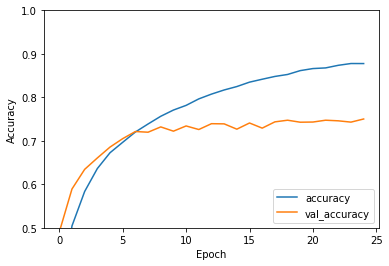

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))